# SASによるシミュレーション

ここではSASで利用できるいくつかの乱数生成関数について説明します。

* 大規模なデータセットからランダムな標本を抽出する
* ランダム化比較実験における被験者への処置割り当て計画を作成する
* 基本的な確率分布に従う乱数を生成する (シミュレートする)

ここで使用される乱数生成関数には以下のようなものがあります。

* **ranuni**: 0 から 1 までの一様分布に従って乱数を生成します。
* **rannor**: 標準正規分布に従って乱数を生成します。
* **ranbin**: n 回の試行で成功確率が p のベルヌーイ試行から乱数を生成します。
* **ranpoi**: 平均 m のポアソン分布に従って乱数を生成します。

ここでは取り上げませんが、SASには他にも様々な乱数生成関数があります。例えば、コーシー分布 (rancau)、ガンマ分布 (rangam)、三角分布 (rantri)、指数分布 (ranexp)、個別確率を指定した離散分布 (rantbl) などがあります。

以降に進むにあたっては、主にデータステップで利用できるツールを活用します。具体的には、DOループ、IF-THEN-ELSE ステートメント、RETAIN ステートメント、OUTPUT ステートメントなどです。このようなアプローチを取ることで、データステップの便利なテクニックを確認して実践するだけでなく、ランダムサンプリング、ランダム割り当て、シミュレーションのプロセスをより深く理解することができます。

ただし、ランダムサンプリングに関しては、データステップに加えて、将来的に役立つよう基本的な機能を知ってもらうために、SURVEYSELECT プロシジャも使用します。コースの時間の制約と PLAN プロシジャの複雑さから、ランダム割り当ての実行には PLAN プロシジャを使用しません。しかし、興味があれば自分で確認してみることをお勧めします。

## 非復元無作為抽出

大規模なデータセットからレコードをランダムに選択することは、データセットが大きすぎて処理ができない・時間がかかる場合、あるいは調査を実施していてマスターデータベースからランダムな標本を選択する必要がある場合に役立ちます。

大きなデータセット (またはマスターデータベース) からレコードをランダムに選択する場合、いくつかの方法があります。

* **非復元抽出**: オブザベーションの一部がランダムに選択され、一度選択されたオブザベーションは再度選択されません。
* **復元抽出**: オブザベーションの一部がランダムに選択され、一つのオブザベーションが複数回選択される可能性があります。
* **層化抽出**: 層化変数の値で定義された各グループからオブザベーションの一部がランダムに選択され、一度選択されたオブザベーションは再度選択されません。

ここでは、無標本抽出について説明し、その後復元抽出と層化抽出について説明します。  

これらでは、架空の宛先リストを使用します。このリストは、大規模なカタログ通販会社が顧客の一部を対象としたランダムな調査を実施したいと考えているシナリオで用います。使用する実際のリストは、実務で使用するものよりもはるかに小さいものですが、ランダムサンプリング手法を説明する目的でのみ使用されます。

使用する宛先リストは、永久データセットmailingに格納されています。次のコードは、単に宛先リストを出力するものです。

<!-- 
# Simulations in SAS

In this lesson, we'll investigate ways to use some of the random number generators available in SAS:

* to select a random sample of observations from a larger data set
* to generate a scheme for assigning treatments to subjects in a randomized, controlled experiment
* to generate (i.e., "simulate") numbers that follow some underlying probability distribution

The random generator functions used in the lesson include:

* **ranuni**, which generates a number from a uniform (0, 1) distribution
* **rannor**, which generates a number from a standard normal distribution
* **ranbin**, which generates a number from a binomial (n, p) distribution
* **ranpoi**, which generates a number from a poisson distribution with mean m.

Other random functions available in SAS, but not illustrated in this lesson include **rancau** (a Cauchy distribution), **rangam** (a Gamma distribution), **rantri** (a triangular distribution), **ranexp** (an exponential distribution), and **rantbl** (a discrete distribution with user-specified probabilities).

In accomplishing the goals of the lesson, we'll primarily take advantage of the tools that are available to us in a SAS data step, such as do loops, if-then-else statements, retain, and output statements. By taking such an approach, we have not only the opportunity to review and put into practice these useful data step techniques, but also the opportunity to better understand the processes of random sampling, random assignment and simulation. In the case of random sampling, however, in addition to using the data step, we will also use the SURVEYSELECT procedure just so that you are aware of its basic functionality for your future use. Due to time constraints of the course and the complexity of the PLAN procedure, we will not use it to accomplish any of our random assignments. You should be aware, however, of its existence should you want to explore it on your own in the future.

## Random Sampling without Replacement

Randomly selecting records from a large data set may be helpful if your data set is so large as to prevent or slow processing, or if one is conducting a survey and needs to select a random sample from some master database. When you select records randomly from a larger data set (or some master database), you can achieve the sampling in a few different ways, including:

* **sampling without replacement**, in which a subset of the observations are selected randomly, and once an observation is selected it cannot be selected again.
* **sampling with replacement**, in which a subset of observations are selected randomly, and an observation may be selected more than once.
* **selecting a stratified sample**, in which a subset of observations are selected randomly from each group of the observations defined by the value of a stratifying variable, and once an observation is selected it cannot be selected again.

In this section, we'll investigate sampling without replacement. Then, in the next two sections, we'll investigate sampling with replacement and selecting a stratified sample. Throughout the three sections we'll work with a contrived mailing list. We'll use the list under the guise of being a large catalog mail-order company wanting to conduct a random survey of a subset of our customers. The actual list we'll use is admittedly (much) smaller than what we would be working with in practice. Our teeny-tiny mailing list is, of course, used merely for the purpose of illustrating some random sampling techniques in SAS.

The mailing list with which we will be working is contained in a permanent SAS data set called mailing. The following SAS code simply prints the mailing list:
-->

In [1]:
libname phc6089 '/folders/myfolders/SAS_Notes/data';

title 'Sample Dataset: Mailing List'; 
proc print data=phc6089.mailing(obs=5);    
run;

OBS,Num,Name,Street,City,State
1,1,Jonathon Smothers,103 Oak Lane,Bellefonte,PA
2,2,Jane Doe,845 Main Street,Bellefonte,PA
3,3,Jim Jefferson,10101 Allegheny Street,Bellefonte,PA
4,4,Mark Adams,312 Oak Lane,Bellefonte,PA
5,5,Lisa Brothers,89 Elm Street,Bellefonte,PA


データセットmailing.sas7bdatは、READMEに記載しているデータフォルダにあります。データセットを保存した場所を反映するように LIBNAME ステートメントを編集してください。プログラムを実行して生成された出力からデータセットの内容を確認してください。

SAS などのコンピュータプログラムを使用して、大きなデータセットから一部のオブザベーションをランダムに選択する場合には、2 つの方法があります。データセット内のオブザベーションの一定割合 (例えば 30%) をランダムに選択するような指示と、データセット内から特定の個数 (例えば 25 個) のオブザベーションをランダムに選択するように指示があります。前者の方法では、抽出されたデータセットが特定のサイズになることは保証されません。このような標本は「近似サイズの標本」とみなします。一般に、近似サイズの標本を取得するには、元のデータセットから k% のオブザベーションを選択します。

<!-- 
The mailing datatset, mailing.sas7bdat, can be found in the data folder available on the course website. Be sure to edit the LIBNAME statement so that it reflects the location in which you saved the data set. Run the program and review the resulting output in order to familiarize yourself with the data set.

When using a computer program, such as SAS, to randomly select a subset of observations from some larger data set, there are two approaches we can take. We could tell SAS to randomly select a percentage, say 30%, of the observations in the data set. Or, we could tell SAS to randomly select an exact number, say 25, of the observations in the data set. With the former approach, we cannot be guaranteed that the subset data set will achieve a specific size. We consider such samples then an "approximate-sized sample." In general, to obtain an approximate-sized sample, one selects k% of the observations from the original data set.
 -->

### 例

次のプログラムは、データステップを使用して無標本抽出による近似サイズのランダム標本を取得する方法を示しています。具体的には、ranuni 関数と WHERE ステートメントを使用して、50オブザベーションの永久データセット mailing から約 30%をランダムにサンプリングします。


<!-- 
### Example

The following program illustrates how to use a SAS data step to obtain an **approximate-sized random sample without replacement**. Specifically, the program uses the **ranuni** function and a WHERE statement to tell SAS to randomly sample approximately 30% of the 50 observations from the permanent SAS data set mailing:
-->

In [2]:
data sample1A (where = (random <= 0.30));
  set phc6089.mailing;
  random = ranuni(43420);
run;

title1 'Sample1A: Approximate-Sized Simple Random Sample';
title2 'without Replacement'; 
proc print data=sample1A noobs;
run;

Num,Name,Street,City,State,random
1,Jonathon Smothers,103 Oak Lane,Bellefonte,PA,0.07478
2,Jane Doe,845 Main Street,Bellefonte,PA,0.25203
4,Mark Adams,312 Oak Lane,Bellefonte,PA,0.08918
6,Delilah Fequa,2094 Acorn Street,Bellefonte,PA,0.02253
7,John Doe,812 Main Street,Bellefonte,PA,0.15570
8,Mamie Davison,102 Cherry Avenue,Bellefonte,PA,0.05460
9,Ernest Smith,492 Main Street,Bellefonte,PA,0.05662
14,William Edwards,79 Oak Lane,Bellefonte,PA,0.15432
38,Miriam Denders,2348 Robin Avenue,Port Matilda,PA,0.16192
41,Lou Barr,219 Eagle Street,Port Matilda,PA,0.13033


プログラムを開いて実行し、生成された出力からランダム標本の内容を確認してください。いくつかの点に注意する必要があります。まず、ランダム標本に含まれる人々は、50までの「Num」の値にわたって比較的均等に分布しているようです。また、最終的なランダム標本には、データセットmailing の50オブザベーションのうち 20オブザベーションが含まれています。これは 40% (20/50) であり、要求していた 30% の標本よりも少し大きくなっていますが、使用した方法の制約によるものです。最後に、変数 「random」 には 0.30 より小さい値しか含まれないことに注意してください。これは、DATA ステートメントのデータセットオプションのWHERE= オプションの影響です。

それでは、このプログラムがどのように動作するかについて説明します。説明に入る前に、この手法は統計学者が一般的に使用する手法であることを念頭に置いてください。この方法は、SAS だけでなく、あらゆるプログラムで動作します。

まず、変数「random」に (擬似) 乱数を生成するために ranuni関数を使用します。ranuni関数は 0 と 1 の間の値を生成します。ranuni関数の引数43420はシードと呼ばれ、ユーザーによって指定されます。一般的に：

* シードは、2,147,483,647 より小さい非負の数値である必要があります。
* 特定のシードを使用すると、常に同じ結果が得られます。つまり、同じシードを使用すると、ranuni 関数は常に同じオブザベーションを選択します。
* シードを 0 に設定すると、実行時のコンピュータクロック時間が使用されます。この場合、ranuni 関数が同じ結果を生成する可能性は非常に低くなります。研究を行う際には、必要に応じて結果を再現できるように、ゼロ以外のシードを使用することが一般的です。
* ranuni関数は、変数に割り当てずに使用することもできます。ここでは、結果を出力できるように変数「random」に値を割り当てました。

ranuni関数によって生成される数は 0 と 1 の間に一様分布しているので、約 30% の乱数が 0.30 より小さくなることが期待されます。ここで、DATA ステートメントの WHERE= オプションが役割を果たします。乱数が 0.30 以下の場合は、そのオブザベーションが標本に選択されます。データセットmailing には 50ブザベーションがあるため、約 30% のオブザベーションが選択されて、15 人程度の標本が作成されるはずです。ただし、選択は生成された数値に依存するため、標本のサイズは必ずしも一定になるとは限りません。

シードを何度か変更して、標本にどのような影響を与えるかを確認してみるのもよいでしょう。例えば、シードを 1 にすると、新しいランダム標本には 20 個ではなく 15 個のオブザベーションが含まれることがわかります。また、0.30 以外の値に割合を変化させて、標本のサイズにどのような影響を与えるかを確認してみるのもよいでしょう。

<!-- 
Launch and run the SAS program. Then, review the resulting output to see the random sample that SAS selected from the mailing data set. You should note a couple of things. First, the people that appear in the random sample appear to be fairly uniformly distributed across the 50 possible Num values. Also, the final random sample contains 20 of the 50 observations in the mailing data set. At 40% (20 out of 50), this is a little higher than the 30% sample we were asking for, but it should not be surprising as it is an artifact of the method used. Finally, note that the variable random contains only values that are smaller than 0.30, as should be expected in light of the WHERE= option attached to the DATA statement.
Okay, now how does the program work? Before we answer the question, note that the technique we use is a technique commonly used by statisticians. It will work in any program, not just SAS. Now, for the answer ... the _random_ assignment statement tells SAS to use the **ranuni** function to generate a (pseudo) random number between 0 and 1 and to assign the resulting number to a variable called random. The number 43420 that appears in the parentheses of the **ranuni** function is specified by the user and is called the **seed**. In general:

* The seed must be a nonnegative number less than 2,147,483,647.
* A given seed always produces the same results. That is, using the same seed, the **ranuni** function would select the same observations.
* If you choose 0 as the seed, then the computer clock time at execution is used. In this case, it is very unlikely that the **ranuni** function would produce the same results. It should be noted, that it is common practice when conducting research to use a non-zero seed, so that the results could be reproduced if necessary.
* The **ranuni** function can be used without assigning it to another variable. We assigned the value to the variable called random just so we could print the results.

Now, because the numbers generated by the ranuni function are uniformly distributed across the numbers between 0 and 1, we should expect about 30% of the random numbers to be less than 0.30. That's where the WHERE= option on the DATA statement comes into play. If the random number generated is less than or equal to 0.30, then the observation is selected for inclusion in the sample. Since the mailing data set has 50 observations, about 30% of the observations should be selected to create a sample of approximately 15 people. Because the selection depends on the values of the numbers generated, the sample cannot be guaranteed to be of a certain size.
You might want to change the seed a few times to see how it affects the sample. If you use the seed 1, for example, you'll see that the new random sample contains 15 observations, not 20 as in our first sample. You might also want to change the proportion 0.30 to various other numbers between 0 and 1 to see how it affects the size of the sample.
-->

### 例

次のコードは、非復元抽出による近似サイズのランダム標本を取得するための別の方法を示しています。具体的には、SURVEYSELECT プロシジャを使用して、50オブザベーションの永久データセットmailingから約 30%をランダムにサンプリングするように指示します。


<!-- 
### Example

The following code illustrates an alternative way of randomly selecting an **approximate-sized random sample without replacement**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample approximately 30% of the 50 observations from the permanent SAS data set mailing:
-->

In [3]:
title;
proc surveyselect data = phc6089.mailing
  out = sample1B
  method = SRS
  seed = 12345678
  samprate = 0.30;
run;

title1 'Sample1B: Approximate-Sized Simple Random Sample';
title2 'without Replacement (using PROC SURVEYSELECT)'; 
proc print data = sample1B noobs;    
run;

プログラムを開いて実行し、生成された出力をからSURVEYSELECT プロシジャが実際にデータセットmailingから標本を抽出したことを確認してください。ご覧のとおり、SURVEYSELECT プロシジャは 1 ページ分の出力を生成します。これは単に情報提供のみであり、SURVEYSELECT コードで指定した情報の大部分を繰り返すものです。

* DATA= オプションは、オブザベーションを選択する元のデータセット (phc6089.mailing) の名前を指定します。
* OUT= オプションは、選択されたオブザベーションを格納する出力データセット (sample1B) の名前を指定します。
* METHOD= オプションは、使用するサンプリング方法を指定します。ここでは、SRSは等確率で無標本抽出を使用してオブザベーションを選択するようにします。
* SEED= オプションは、乱数を生成するための初期シード (12345678) を指定します。一般的に、SEED=オプションの値は整数である必要があり、SEED=オプションを指定しない場合、または SEED= 値が負またはゼロの場合、コンピュータクロックが使用されて初期シードが取得されます。
* SAMPRATE= オプションは、入力データセットから標本化するする割合 (0.30)を指定します。

さて、これまで説明してきたのは、非復元抽出による近似サイズのランダム標本のみです。次に3 つの例から、非復元抽出による厳密なサイズのランダム標本を取得する方法を説明します。最も複雑な方法 (データステップを使用) から最も単純な方法 (SURVEYSELECT プロシジャを使用) まで順を追って説明します。

<!-- 
Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample from the mailing data set. As you can see, the SURVEYSELECT procedure produces one page of output that is merely informational, reiterating much of the information that we supplied to SAS in our SURVEYSELECT code:

* The DATA= option tells SAS the name of the input data set (phc6089.mailing) from which observations should be selected.
* The OUT= option tells SAS the name of the output data set (sample1B) in which the selected observations should be stored.
* The METHOD= option tells SAS the sampling method that should be used. Here, SRS tells SAS to use the simple random sampling method to select observations, that is, with equal probability and without replacement.
* The SEED= option tells SAS the initial seed (12345678) for generating the random number. In general, the value of the SEED= option must be an integer, and if you do not specify the SEED= option, or if the SEED= value is negative or zero, the computers clock is used to obtain the initial seed.
* The SAMPRATE= option tells SAS what proportion (0.30) of the input data set should be sampled.

Oh, and the empty title statement that appears in the code is there merely to minimize any confusion its absence may cause you. If it, or another TITLE statement, is not present, the first (informational) page of the SURVEYSELECT output will contain the most recent title, which in this case would concern Sample1A from the previous example. Now that would be confusing!
-->

これまででは非復元抽出による近似のランダム標本を作成しました。次に非復元抽出で厳密なサイズのランダム標本を取得する方法を見ていきます。はじめにデータステップによる比較的複雑な方法で、最後はプロシージャ(SURVEYSELECT)を使う簡単な方法を見ていきます。

### 例

次のプログラムは、データステップを使用して、非復元抽出による厳密なサイズのランダム標本を取得する方法を示しています。具体的には、ranuni 関数と DATA ステートメントを使用して、永久データセット mailingから 15オブザベーションをランダムにサンプリングするように指示します。


<!-- 
Thus far, we've produced only approximate-sized random samples without replacement. Now, we'll turn our attention to three examples that illustrate how to produce exact-sized random samples without replacement. We'll start (naturally?!) with the most complicated procedure first (using a DATA step) and end up with the most straightforward procedure last (using the SURVEYSELECT procedure).

### Example

The following program illustrates how to use a SAS data step to obtain an **exact-sized random sample without replacement**. Specifically, the program uses the **ranuni** function in a DATA step to tell SAS to randomly sample exactly 15 of the 50 observations from the permanent SAS data set mailing:
-->

In [4]:
data sample2;
  set phc6089.mailing nobs=total;
  if _n_ = 1 then n=total;
  retain k 15 n;
  random = ranuni(860244);
  propn = k/n;
  if random <= propn then
    do;
      output;
      k=k-1;
  end;
  n=n-1;
  if k=0 then stop;
run;

title1 'Sample2: Exact-Sized Simple Random Sample';
title2 'without Replacement'; 
proc print data=sample2 noobs;
  var num name n k random propn;
run;

Num,Name,n,k,random,propn
4,Mark Adams,47,15,0.12829,0.31915
5,Lisa Brothers,46,14,0.08799,0.30435
6,Delilah Fequa,45,13,0.02446,0.28889
9,Ernest Smith,42,12,0.01228,0.28571
14,William Edwards,37,11,0.12908,0.29730
15,Harold Harvey,36,10,0.03136,0.27778
41,Lou Barr,32,9,0.11230,0.28125
46,Linda Nicolson,27,8,0.10826,0.29630
16,Linda Edmonds,22,7,0.26260,0.31818
23,Greg Pope,15,6,0.17021,0.40000


プログラムを開いて実行し、結果から実際に宛先のデータセットから15オブザベーションが選択されていることを確認してください。

サンプルを選択するために使用した方法は次のとおりです。

* データセット内の各オブザベーションに対して、一様乱数を生成します。
* 元のデータセットの最初のオブザベーションが、その乱数が必要なレコードの割合（50件中15件、つまり0.30）以下であれば、サンプルに含めます。
* サンプルでまだ必要な割合を変更します。最初のオブザベーションがサンプルに含まれた場合は14/49、含まれなかった場合は15/49になります。2番目のオブザベーションに対して生成された乱数がこの割合以下であれば、サンプルに含めます。
* 15件のオブザベーションを正確に選択するまで、このプロセスを続けます。

では、データステップを使用してこの方法を実行するにはどうすればよいでしょうか。以下では順を追って説明します。

* k：サンプルを完成させるために必要なオブザベーションの数
* n：元のデータセットから読み取る残りのオブザベーションの数

2つの変数kとnを定義します。

* SETステートメントのNOBS=オプションを使用して、phc6089.mailingデータセットのオブザベーション数を取得し、変数「total」に割り当てます。一般的に、NOBS=オプションは、SETステートメントで指定されたデータセットのオブザベーションの総数を値とする一時変数を生成し、名前を付けます。
* 最初のオブザベーションの場合、つまり自動変数「\_N\_」が1の場合、変数「n」に変数「total」の値（ここでは50）を設定します。（自動変数はデータステップによって自動的に作成され、プログラムデータベクトルに追加されますが、作成されているデータセットに出力されません。自動変数の値は、データステップの1回の反復から次の反復まで保持され、欠損値に設定されることはありません。自動変数\_N\_は最初に1に設定されます。データステップがDATAステートメントをループするたびに、変数「\_N\_」は1ずつ増加します。「\_N\_」の値はデータステップが反復した回数で、多くの場合出力データセットのオブザベーション数を表します。）
* RETAINステートメントを使用して、kを最終サンプルで必要なオブザベーション数である15に初期化します。
* ranuni関数（シード860244から開始）を使用して、0から1の一様乱数を生成します。kとnを使用して、データセットmailingからまだ選択する必要があるオブザベーションの割合を決定します。
* 生成された乱数が、まだ必要なオブザベーションの割合より小さい場合、そのオブザベーションを出力データセットに出力します。オブザベーションが選択された場合、サンプルでまだ必要なオブザベーション数を1減らします（つまり、k = k-1）。
* データステップの各反復の最後に、

    * データセットmailingに残っているオブザベーション数を1減らします（n = n - 1）。
    * サンプリングが完了しているかどうかを判断します（k = 0？）。完了している場合は、中止するように指示します。一般的に、STOPステートメントは、現在のデータステップの処理をすぐに停止し、以降の処理から再開します。

random = ranuni()とpropn = k/nの割り当ては、これらの値を出力できるようにするためにのみ行われます。これらの値は`if ranuni() le k/n then do;`のようにIFステートメントに直接組み込まれることもあります。またkとnは出力データセットから削除できますが、ここでは、教育目的のために値を出力できるように保持されています。

<!-- 
Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set.
In summary, here's the approach used to select the sample:

* For each observation in the data set, generate a uniform random number.
* Select the first observation in the original data set for inclusion in the sample if its random number is less than or equal to the proportion of records needed (15 of 50, or 0.30).
* Modify the proportion still needed in the sample. Here, it is 14/49 if the first observation was selected for the sample; and it is 15/49 if it was not. If the random number generated for the second observation is less than or equal to this proportion, include it in the sample.
* Continue this process until you have selected exactly 15 observations.

Now, how to accomplish this approach using the SAS DATA step? Here's how we did it step-by-step:
k = the number of observations needed to complete the sample.
n = the number of observations left to read from the original data set.

* Define two variables k and n, where:
* Using the NOBS= option of the SET statement, determine the number of observations in the phc6089.mailing data set and assign the value to a variable called total. In general, the NOBS= option creates and names a temporary variable whose value is the total number of observations in the data set specified in the SET statement.
* For the first observation, that is, when the automatic variable \_N\_ equa1s 1, set the variable n to the value of the variable total (here, 50). (Recall that automatic variables are created automatically by the DATA step, are added to the program data vector, but are not output to the data set being created. The values of automatic variables are retained from one iteration of the DATA step to the next, rather than set to missing. The automatic variable \_N\_ is initially set to 1. Each time the DATA step loops past the DATA statement, the variable \_N\_ increments by 1. The value of \_N\_ represents the number of times the DATA step has iterated, and often equals the number of observations in the output data set.)
* Using the RETAIN statement, initialize k to 15, the number of observations desired in the final sample.
* Use the **ranuni** function (starting with a seed of 860244) to generate a uniform random number between 0 and 1. Use k and n to determine the proportion of observations that still needs to be selected from the mailing data set.
* If the random number generated is less than the proportion of observations still needed, then OUTPUT the observation to the output data set. When an observation is selected, reduce the number of observations still needed in the sample by 1 (that is, k = k-1).
* At the end of each iteration of the DATA step: 
    * reduce the number of observations left in the mailing data set by 1 (n = n - 1)
    * determine if the sample is complete (is k = 0?). If yes, tell SAS to STOP. In general, the STOP statement tells SAS to stop processing the current DATA step immediately and resume processing statements after the end of the current DATA step.

Note that the random = **ranuni** () and propn = k/n assignments are made here only so their values can be printed. In another situation, these values would be incorporated directly in the IF statement: if **ranuni** () le k/n then do; Additionally, k and n could be dropped from the output data set, but are kept here, so their values can be printed for educational purposes.
-->

### 例

以下のコードはデータステップにより非復元抽出による厳密なサイズのランダム標本を取得する他の方法を示しています。このコードでは２つのデータステップとソートは必要なため効率的ではないですが、こちらの処理のほうが自然でわかりやすいかもしれません。

<!-- 
### Example

The following code illustrates an alternative way of using a DATA step to randomly select an **exact-sized random sample without replacement**. The code, while less efficient — because it requires that the data set be processed twice and sorted once — may feel more natural and intuitive to you:
-->

In [5]:
data sample3A;
  set phc6089.mailing;
  random=ranuni(860244);
run;
 
proc sort data=sample3A;
  by random;
run;
 
data sample3A;
  set sample3A;
  if _n_ <= 15;
run;

title1 'Sample3A: Exact-Sized Simple Random Sample';
title2 'without Replacement'; 
proc print data=sample3A;
run;

OBS,Num,Name,Street,City,State,random
1,9,Ernest Smith,492 Main Street,Bellefonte,PA,0.01228
2,6,Delilah Fequa,2094 Acorn Street,Bellefonte,PA,0.02446
3,15,Harold Harvey,480 Main Street,Bellefonte,PA,0.03136
4,28,Srabashi Kundu,112 E. Beaver Avenue,State College,PA,0.08095
5,5,Lisa Brothers,89 Elm Street,Bellefonte,PA,0.08799
6,46,Linda Nicolson,71 Liberty Terrace,Port Matilda,PA,0.10826
7,41,Lou Barr,219 Eagle Street,Port Matilda,PA,0.11230
8,4,Mark Adams,312 Oak Lane,Bellefonte,PA,0.12829
9,14,William Edwards,79 Oak Lane,Bellefonte,PA,0.12908
10,36,Daniel Fremgen,103 W. College Avenue,State College,PA,0.14088


プログラムを開いて実行し、結果として得られた出力から実際に宛先データセットから15オブザベーションが選択されたことを確認してください。  
このアプローチは、以前に行った非復元抽出での近似サイズの選択の方法と非常に似ています。つまり：

* データセットの各オブザベーションに対して、ranuni関数を使用して一様乱数を生成し、それを変数「random」に格納します。
* データセットを乱数「random」でソートします。
* 自動変数\_N\_を使用して、ソートされたデータセットから最初の15オブザベーションを選択します（if \_N\_ <= 15）。

こうすることで、宛先データセット内のすべてのオブザベーションが先頭15オブザベーションのうちの1つになる可能性が等しくなり、したがってサンプルに選ばれる可能性も等しくなります。

<!-- 
Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set.
The approach used is very similar to the approach used previously for selecting an approximate-sized sample without replacement. That is:

* For each observation in the data set, use the **ranuni** function to generate a uniform random number and store it in the variable called random.
* Sort the data set by the random number random.
* Select the first 15 observations from the sorted data set using the automatic variable \_N\_ (if \_N\_ le 15).

By so doing, every observation in the mailing data set has an equal likelihood of being one of the first 15 observations, and therefore an equal likelihood of being selected into the sample.
-->

### 例

以下のコードは、非復元抽出による厳密なサイズのランダム標本を取得する別の方法を示しています。具体的には、SURVEYSELECTプロシージャを使用して、50オブザベーションの永久データセットmailingから正確に15オブザベーションをランダムにサンプリングします。

<!-- 
### Example

The following code illustrates yet another alternative way of randomly selecting an **exact-sized random sample without replacement**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample exactly 15 of the 50 observations from the permanent SAS data set mailing:
-->

In [7]:
title;
proc surveyselect data = phc6089.mailing
  out = sample3B
  method = SRS
  seed = 12345678
  sampsize = 15;    
run;

title1 'Sample3B: Exact-Sized Simple Random Sample';
title2 'without Replacement (using PROC SURVEYSELECT)'; 
proc print data = sample3B;
run;

プログラムを開いて実行し、結果として得られた出力から実際に宛先データセットから15のオブザベーションが選択されたことを確認してください。このコードと前のSURVEYSELECTによるコードの唯一の違いは、ここでのsampsize = 15が、前のコードのsamprate = 0.30に置き換わっていることです。シード（seed）とサンプルサイズ（sampsize）を数回変更して、サンプルにどのように影響するかを確認してみてください。

<!-- 
Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set. Note that the only difference between this code and the previous SURVEYSELECT code is the sampsize = 15 statement here replaces the samprate = 0.30 statement there. You might want to change the seed (seed) and sample size (sampsize) a few times to see how it affects the sample.
-->

## 復元無作為抽出

前のセクションでは、選択したすべてのサンプルは復元されませんでした。つまり、データセットからオブザベーションが一度選択されると、再び選択されることはありませんでした。今度は、復元抽出の方法を見ていきます。つまり、オブザベーションが一度選択されても、それが再び選択されるのを防ぐことはありません。

### 例

以下のコードは、データステップを使用して正確なサイズのランダムサンプルを復元抽出で選択する方法を示しています。具体的には、ranuni関数とSETステートメントのPOINT=オプションを組み合わせて、永久50オブザベーションのデータセットmailingから正確に15オブザベーションをランダムにサンプリングします。


<!-- 
## Random Sampling with Replacement

In the previous section, all of the samples that we selected were without replacement. That is, once an observation was selected from the data set, it could not be selected again. Now, we'll investigate how to take random samples with replacement. That is, if an observation is selected once, it does not prevent it from being selected again.

### Example

The following code illustrates how to use the DATA step to randomly select an **exact-sized random sample with replacement**. Specifically, the program uses the **ranuni** function in conjunction with the POINT= option of the SET statement to tell SAS to randomly sample exactly 15 of the 50 observations from the permanent SAS data set mailing:
-->

In [8]:
data sample4A;
  choose=int(ranuni(58)*n)+1;
  set phc6089.mailing point=choose nobs=n;
  i+1;
  if i > 15 then stop;
run;

title1 'Sample4A: Exact-Sized Unrestricted Random Sample';
title2 'Selects units with equal probabilities & with replacement';
proc print data=sample4A;
run;

OBS,Num,Name,Street,City,State,i
1,24,Mark Mendel,256 Fraser Street,State College,PA,1
2,14,William Edwards,79 Oak Lane,Bellefonte,PA,2
3,10,Laura Mills,704 Hill Street,Bellefonte,PA,3
4,3,Jim Jefferson,10101 Allegheny Street,Bellefonte,PA,4
5,45,Ann Draper,72 Lake Road,Port Matilda,PA,5
6,11,Linda Bentlager,1010 Tricia Lane,Bellefonte,PA,6
7,47,Barb Wyse,21 Cleveland Drive,Port Matilda,PA,7
8,29,Joe White,678 S. Allen Street,State College,PA,8
9,32,George Ball,888 Park Avenue,State College,PA,9
10,31,Robert Williams,156 Straford Drive,State College,PA,10


プログラムを開いて実行し、結果として得られた出力から実際に宛先データセットから15オブザベーションが選択されたことを確認してください。  
このコードの理解の鍵は、

```
choose = int(ranuni(58)*n) + 1
```

という式が何を行うかを理解することです。  
ご存じの通り、ranuni(58)は、初期シード58を使用して0から1の間の一様乱数を生成します。例として0.99を生成したと仮定します。すると、「choose」の値は次のように計算されて50になります：

```
choose = int(0.99*50) + 1 = int(49.5) + 1 = 49 + 1 = 50
```

そして、0.01を生成した場合、「choose」の値は次のように計算されて1になります：

```
choose = int(0.01*50) + 1 = int(0.5) + 1 = 0 + 1 = 1
```

このようにして、この式は常にデータセットのオブザベーションnまでの正の整数1、2、3、...を生成します。次にこのような乱数を何度も生成させて、希望するサンプルサイズに達するまで繰り返し生成させるだけです。  
アプローチの概要は次のとおりです：

* SETステートメントのNOBS=オプションを使用して、元のデータセットのオブザベーション数nを取得します。
* 上記のchoose=代入文を使用して、1からnの間の乱数を生成します。（choose=代入ステートメントはSETステートメントの前に配置する必要があります。そうしないと、SASは最初にどのオブザベーションを読み取るかをわからないためです。）
* SETステートメントのPOINT=オプションを使用して、元のデータセットから「choose」番目のオブザベーションを選択します。POINT=オプションは、オブザベーション番号による直接アクセスを使用してデータセットを読み取ります。一般的に、POINT=オプションを使用すると、一時変数（ここではchoose）の値が読み取るオブザベーションの番号になります。
* 上記の2つのステップを繰り返し、選択したオブザベーションの数をカウントします。式i + 1はカウントを処理します：デフォルトでは、データステップの最初の反復時にiを0に設定し、その後の各反復でiを1ずつ増やします。
* 希望するオブザベーション数（ここでは15）を選択したら、STOPするようにします。POINT=オプションを使用する場合、STOPステートメントを使用してデータステップの処理を停止するように指示する必要があることに注意してください。

これで完了です！シード（58）やサンプルサイズ（15）を数回変更して、サンプルにどのように影響するかを確認してみてください。

<!-- 
Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set.
The key to understanding how this code works is to understand what the expression:

```
choose = int(ranuni(58)*n) + 1
```

accomplishes. As you know, ranuni(58) tells SAS to use an initial seed of 58 to generate a uniform random number between 0 and 1. For the sake of example, suppose SAS generates the number 0.99. Then, the value of choose becomes 50 as calculated here:

``` 
choose = int(0.99*50) + 1 = int(49.5) + 1 = 49 + 1 = 50
```

And, if SAS generates the number 0.01, the value of choose becomes 1 as calculated here:

```
choose = int(0.01*50) + 1 = int(0.5) + 1 = 0 + 1 = 1
```

In this way, you can see how the expression always generates a positive integer 1, 2, 3, ..., up to n, the number of observations in your data set. All we need to do then is to tell SAS to generate such a random integer over and over again until we reach our desired sample size.
Here's a summary of the approach:

* Use the NOBS= option of the SET statement to determine n, the number of observations in the original data set.
* Use the above choose= assignment statement to generate a random integer between 1 and n. (Note that the choose= assignment statement must be placed before the SET statement. If it is not, SAS would not know which observation to read first.)
* Use the POINT= option of the SET statement to select the choose'th observation from the original data set. The POINT= option tells SAS to read the SAS data set using direct access by observation number. In general, with the POINT= option, you name a temporary variable (here, choose) whose value is the number of the observation you want the SET statement to read.
* Perform the above two steps repeatedly, keeping count of the number of observations selected. The expression i + 1 takes care of the counting for us: by default, SAS sets i to 0 on the first iteration of the DATA step, and then increases i by 1 for each subsequent iteration.
* Once you've selected the number of observations desired (15, here), tell SAS to STOP. Note that when using the POINT= option, you must use a STOP statement to tell SAS when to stop processing the DATA step.

That's all there is to it! Again, you might want to change the seed (the 58) and the sample size (the 15) a few times to see how it affects the sample.
-->

### 例

以下のコードは、正確なサイズのランダムサンプルを復元抽出で選択する別の方法を示しています。具体的には、SURVEYSELECTプロシージャを使用して、50オブザベーションの永久データセットmailingから正確に15オブザベーションをランダムにサンプリングします。

<!-- 
### Example

The following code illustrates an alternative way of randomly selecting an **exact-sized random sample with replacement**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample exactly 15 of the 50 observations from the permanent SAS data set mailing:
-->

In [9]:
title;
proc surveyselect data = phc6089.mailing
  out = sample4B
  method = URS
  seed = 12345
  sampsize = 15;
run;

title1 'Sample4B: Exact-Sized Unrestricted Random Sample';
title2 'Selects units with equal probabilities & with replacement';
title3 '(using PROC SURVEYSELECT)'; 
proc print data = sample4B;
run;

プログラムを開いて実行し、結果として得られた出力から実際に宛先データセットから15オブザベーションが選択されたことを確認してください。このコードと前のSURVEYSELECTコードの唯一の違いは、ここでのmethod = URSが、前のコードのmethod = SRSに置き換わっていることです。ここでのURSは、置換ありで等しい確率でオブザベーションを選択する制限なしのランダムサンプリング法を使用します。（前のコードとは指定されたシードも異なりますが、それは関係ありません。）  
シード（seed）とサンプルサイズ（sampsize）を数回変更して、サンプルにどのように影響するかを確認してみてください。

<!-- 
Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set. Note that the only difference between this code and the previous SURVEYSELECT code is the method = URS statement here replaces the method = SRS statement there. Here, URS tells SAS to use the unrestricted random sampling method to select observations, that is, with equal probability and with replacement. (Oh, yeah, I guess the specified seed differs from the previous code, too, but that's no matter.)

Again, you might want to change the seed (seed) and sample size (sampsize) a few times to see how it affects the sample.
-->

## 層化無作為抽出

前の2つのセクションでは、オブザベーションが特定のサブグループに属するかどうかに関係なく、データセットからランダムにサンプルを取るようにしていました。調査を実施する際には、特定のサブグループから一定数のオブザベーションがサンプルに含まれるようにすることが重要なことがあります。ここでは、そのような制限について扱います。つまり、このセクションでは、層化変数の値によって決定される各サブグループからランダムに選択されたオブザベーションのサブセットを含む**層別ランダムサンプル**を取得する方法に焦点を当てます。また、一度選択されたオブザベーションが再び選択されない非復元でのサンプリングに戻ります。

### 均等割り付けによる層化抽出

最初に、層化変数の値によって決定される各サブグループから同数のオブザベーションが選択される状況に焦点を当てます。

### 例

以下のコードは、層化グループから等サイズの層別ランダムサンプルを選択する方法を示しています。具体的には、このコードは、変数「city」の値によって決定される3つのサブグループ — State College、Port Matilda、Bellefonte — からそれぞれ5つのオブザベーションをランダムに選択します。

<!-- 
## Stratified Random Sampling

In the two previous sections, we were concerned with taking a random sample from a data set without regard to whether an observation comes from a particular subgroup. When you are conducting a survey, it often behooves you to make sure that your sample contains a certain number of observations from each particular subgroup. We'll concern ourselves with such a restriction here. That is, in this section, we'll focus on ways of using SAS to obtain a **stratified random sample**, in which a subset of observations are selected randomly from each subgroup of observations as determined by the value of a stratifying variable. We'll also go back to sampling without replacement, in which once an observation is selected it cannot be selected again.

### Selecting a Stratified Sample of Equal-Sized Groups

We'll first focus on the situation in which an equal number of observations are selected from each subgroup of observations as determined by the value of a stratifying variable.

### Example

The following code illustrates how to select a **stratified random sample of equal-sized groups**. Specifically, the code tells SAS to randomly select 5 observations from each of the three subgroups — State College, Port Matilda, Bellefonte — as determined by the value of the variable city:
-->

In [10]:
proc freq data=phc6089.mailing;
  table city / out=bycount noprint;
run;
 
proc sort data=phc6089.mailing;
  by city;
run;
 
data sample5;
  merge phc6089.mailing bycount (drop = percent);
  by city;
  retain k;
  if first.city then k=5;
  random = ranuni(109);
  propn = k/count;
  if random le propn then
  do;
    output;
    k=k-1;
  end;
  count=count-1;
run;

title 'Count by CITY'; 
proc print data=bycount;    
run;

title 'Sample5: Stratified Random Sample with Equal-Sized Strata'; 
proc print data=sample5;    
  by city;
run;

まずプログラムを開いて実行してください。その後結果として得られた出力から、実際に宛先データセットからBellefonteから5つ、Port Matildaから5つ、State Collegeから5つのオブザベーションが選択されたことを確認してください。  
プログラムの動作はどのようになっているのでしょうか？SASで層別ランダムサンプルを選択するためには、基本的に置換なしで等サイズのランダムサンプルを選択するのと似たコードを使用しますが、今回は各サブグループ内で処理します。より具体的には、プログラムは次のステップで動作します：

* FREQプロシージャの唯一の目的は、層化変数「city」の各水準に対応するphc6089.mailingデータセット内のオブザベーション数を取得することです（したがって、"table city"）。OUT=オプションは変数「city」とその水準のレコード数（count）と割合（percent）を含むデータセットbycountを作成します。
* SORTプロシージャは、phc6089.mailingデータセットを「city」でソートし、その結果を一時データセットmailingに保存して、次のデータステップで「city」ごとに処理できるようにします。
* ソートされたデータセットmailingをデータセットbycountと「city」でマージし、サブグループごとのオブザベーション数を利用できるようにします。オブザベーション数の割合は必要ないため、入力時に削除します。
* データステップの残りのコードは非常に見慣れたものになるはずです。つまり、元のデータセットphc6089.mailing内のサブグループごとのオブザベーション数が利用可能になると、置換なしで等サイズのランダムサンプルを選択するのと同様に、「city」内で選択します（したがって、"by city"）。SASが新しい「city」を読み込むたびに（したがって、"if first.city"）、サブグループのサンプルに必要なオブザベーション数（k）は各サブグループで必要なオブザベーション数（ここでは5）に設定されます。

注：前と同様に、random = ranuni( )およびpropn = k/nの割り当てステートメントは、その値を出力するためだけにあります。これらの値は`if ranuni( ) le k/n then do;`のようにIFステートメントに直接組み込まれることもあります。さらに、kとcountは出力データセットから削除できますが、教育目的のためにその値を出力するためここでは保持されています。


<!-- 
First, launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, five observations from Port Matilda, and five observations from State College.
Now, how does the program work? In order to select a stratified random sample in SAS, we basically use code similar to selecting equal-sized random samples without replacement, except now we process within each subgroup. More specifically, here's how the program works step-by-step:

* The sole purpose of the FREQ procedure is to determine the number of observations in the phc6089.mailing data set that correspond to each level of the stratification variable city (hence, "table city"). The OUT = option tells SAS to create a data set called bycount that contains the variable city and two variables that contain the number (count) and percentage (percent) of records for each level of city.
* The SORT procedure merely sorts the phc6089.mailing data set by city and stores the sorted result in a temporary data set called mailing so that it can be processed by city in the next DATA step.
* Merge, by city, the sorted data set mailing with the bycount data set, so that the number of observations per subgroup is available. Since the percentage of observations is not needed, drop it from the data set on input.
* The rest of the code in the DATA step should look very familiar. That is, once the number of observations per subgroup in the original phc6089.mailing data set is available, you can randomly select records from the subgroup as you would select equal-sized random samples without replacement, except you select within city (hence, "by city"). Every time SAS reads in a new city (hence, "if first.city"), the number of observations still needed in the subgroup's sample (k) is set to the number of observations desired in each of the subgroups (5, here).

Note that, again, the random = **ranuni** ( ) and propn = k/n assignments are made here only so their values can be printed. In another situation, these values would be incorporated directly in the IF statement: if **ranuni** ( ) le k/n then do; Additionally, k and count could be dropped from the output data set, but are kept here, so their values can be printed for educational purposes.
-->

### 例

以下のコードは、均等割り付けによる層化抽出別の方法を示しています。このコードは、データセットを2回処理し、1回ソートする必要があるため、効率は低いですが、より自然で直感的に感じられるかもしれません：


<!-- 
### Example

The following code illustrates an alternative way of randomly selecting a **stratified random sample of equal-sized groups**. The code, while less efficient — because it requires that the data set be processed twice and sorted once — may feel more natural and intuitive to you:
-->

In [11]:
data scollege pmatilda bellefnt;
  set phc6089.mailing;
  if city = 'State College' then output scollege;
  else if city = 'Port Matilda'  then output pmatilda;
  else if city = 'Bellefonte'    then output bellefnt;
run;
 
%macro select (dsn, num);
  data &dsn.;
    set &dsn.;
    random=ranuni(85329);
  run;

  proc sort data=&dsn.;
    by random;
  run;
  
  data &dsn.;
    set &dsn.;
    if _n_ <= &num.;
  run;
%mend select;
 
%select(scollege, 5);  %select(pmatilda, 5);  %select(bellefnt, 5); 
 
data sample6A;
  set bellefnt pmatilda scollege;
run;

title 'Sample6A: Stratified Random Sample with Equal-Sized Strata'; 
proc print data=sample6A;    
  by city;
run;

OBS,Num,Name,Street,State,random
1,10,Laura Mills,704 Hill Street,PA,0.05728
2,4,Mark Adams,312 Oak Lane,PA,0.22701
3,13,James Whitney,104 Pine Hill Drive,PA,0.28315
4,12,Fran Cipolla,912 Cardinal Drive,PA,0.34773
5,5,Lisa Brothers,89 Elm Street,PA,0.42637
OBS,Num,Name,Street,State,random
6,47,Barb Wyse,21 Cleveland Drive,PA,0.05728
7,41,Lou Barr,219 Eagle Street,PA,0.22701
8,50,George Matre,75 Ashwind Drive,PA,0.28315
9,49,Tim Winters,95 Dove Street,PA,0.34773


まず、プログラムを開いて実行します。その後、結果として得られた出力から実際に宛先データセットよりBellefonteから5つ、Port Matildaから5つ、State Collegeから5つのオブザベーションが選択されたことを確認してください。  
プログラムはどのように動作するのでしょうか？以下に、このアプローチの概要を示します：

* 最初のデータステップは、IF-THEN-ELSEステートメントをOUTPUTステートメントと組み合わせて使用し、元のデータセットmailingを「city」の値に基づいていくつかのデータセットに分割します。（ここでは、「city」の各値のために3つのデータセット、つまりscollege、pmatilda、およびbellefntを作成します。）
* 次に、マクロselectは、無作為非復元抽出の例を模倣します。つまり、マクロは各オブザベーションに対して乱数を生成し、データセットは乱数でソートされ、最初の「num」の数のオブザベーションが選択されます。
* 次に、マクロselectを「city」の各値のデータセット、つまりscollege、pmatilda、およびbellefntに対して3回呼び出し、それぞれから5つのオブザベーションを選択します。
* 最後に、最終データステップは、3つのデータセットbellefnt、scollege、およびpmatildaを5つのオブザベーションずつで1つのデータセットsample6Aに連結します。

すべてが終わると、層化グループから等サイズの層別ランダムサンプルを得られます！2つ目のアプローチもチェック完了です。次は最後のアプローチです！


<!-- 
First, launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, five observations from Port Matilda, and five observations from State College.
Now, how does the program work? In summary, here's how this the approach works:

* The first DATA step uses an IF-THEN-ELSE statement in conjunction with OUTPUT statements to divide the original mailing data set up into several data sets based on the value of city. (Here, we create three data sets, one for each city... namely, scollege, pmatilda, and bellefnt.)
* Then, the macro select exactly mimics the creation of the sample3A data set in Example 10.5 on the Random Sampling Without Replacement page. That is, the macro generates a random number for each observation, the data set is sorted by the random number, and then the first num observations are selected.
* Then, call the macro select three times once for each of the city data sets .... scollege, pmatilda, and bellefnt .... selecting five observations from each.
* Finally, the final DATA step concatenates the three data sets, bellefnt, scollege, and pmatilda, with 5 observations each back into one data set called sample6A with the 15 randomly selected observations..

Lo and behold, when all is said and done, we have another stratified random sample of equal-sized groups! Approach #2 checked off. Now, onto one last approach!
-->

### 例

以下のコードは、均等割り付けによる層化抽出の別の方法を示しています。具体的には、SURVEYSELECTプロシージャを使用して、永久データセットmailingから「city」の値のサブグループから正確に5オブザベーションをランダムにサンプリングします。

<!-- 
### Example

The following code illustrates yet another alternative way of randomly selecting a **stratified random sample of equal-sized groups**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample exactly five observations from each of the three city subgroups in the permanent SAS data set mailing:
-->

In [12]:
title;
proc surveyselect data = phc6089.mailing
  out = sample6B
  method = SRS
  seed = 12345678
  sampsize = (5 5 5);
  strata city notsorted;
run;

title1 'Sample6B: Stratified Random Sample';
title2 'with Equal-Sized Strata (using PROC SURVEYSELECT)'; 
proc print data = sample6B;
run;

まずプログラムを開いて実行します。その後結果として得られた出力から実際に宛先データセットのBellefonteから5つ、Port Matildaから5つ、State Collegeから5つのオブザベーションが選択されたことを確認してください。  
コードの詳細について説明します。ここでの新しい要素はSTRATAステートメントとSAMPSIZEステートメントだけです。STRATAステートメントは、変数「city」によって定義された非重複グループに入力データセットstat482.mailingを分割します。NOTSORTEDオプションは、データセットがソートされていないことを伝えるわけではありません。代わりに、NOTSORTEDオプションは、データセット内のオブザベーションが「city」によりグループごとに配置されていて、そのグループが必ずしもアルファベット順に並んでいないことを伝えます。SAMPSIZEステートメントは、「city」の各値のグループから5つのオブザベーションをサンプリングすることを伝えます。

<!-- 
First, launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, five observations from Port Matilda, and five observations from State College.
Now, the specifics about the code. The only things that should look new here are the STRATA statement and the form of the SAMPSIZE statement. The STRATA statement tells SAS to partition the input data set stat482.mailing into nonoverlapping groups defined by the variable city. The NOTSORTED option does not tell SAS that the data set is unsorted. Instead, the NOTSORTED option tells SAS that the observations in the data set are arranged in city groups, but the groups are not necessarily in alphabetical order. The SAMPSIZE statement tells SAS that we are interested in sampling five observations from each of the city groups.
-->

### 均等割り付けでない層化抽出

今回は、層化変数の値に基づいてオブザベーションが各サブグループから同じ数でなく選択される状況に焦点を当てます。元のデータセットの各サブグループに均等でないオブザベーション数がある場合、各サブグループから同じ割合のオブザベーションを選択することでこのサンプリング方式を実現できます。ここでも非復元で抽出をするので、一度オブザベーションが選択されると再選択されることはありません。

**均等割り付けでない層化抽出**を行うために、異なるグループサンプルサイズを前のマクロselectに渡すことができます。別の方法として、各サブグループのオブザベーション数(n)と各サブグループから選択する必要があるオブザベーション数(k)を含むデータセットを作成することもできます。データセットを作成したら、元のデータセットとマージし、前述のように非復元抽出としてオブザベーションをランダムに選択できます。以下の例ではそのアプローチを使用しています。

#### 例

次のコードは、均等割り付けでない層化抽出の方法を示しています。具体的には、このコードは、変数「city」の値に基づいて、Bellefonteから5つ、Port Matildaから6つ、State Collegeから8つのオブザベーションをランダムに選択します。


<!-- 
### Selecting a Stratified Sample of Unequal-Sized Groups

Now, we'll focus on the situation in which an unequal number of observations are selected from each subgroup of observations as determined by the value of a stratifying variable. If there are an unequal number of observations for each subgroup in the original data set, this sampling scheme may be accomplished by selecting the same proportion of observations from each subgroup. Again, we'll sample without replacement, in which once an observation is selected it cannot be re-selected.

To select a **stratified random sample of unequal-sized groups**, we could use the code from Example 10.10 by passing the different group sample sizes into the macro select. Alternatively, we could create a data set containing two count variables ...one that contains the number of observations in each subgroup (n) ...and the other that contains the number of observations that need to be selected from each subgroup (k). Once the data set is created, we could merge it with the original data set, and select observations randomly as we have done previously for random samples without replacement. That's the strategy that the following example uses.

### Example

The following code illustrates how to select a **stratified random sample of unequal-sized groups**. Specifically, the code tells SAS to randomly select 5, 6, and 8 observations, respectively, from each of the three subgroups — Bellefonte, Port Matilda, and State College — as determined by the value of the variable city:
-->

In [13]:
data nselect;
  set phc6089.mailing (keep = city);
  by city;
  n+1;
  if last.city then do;
    input k;
    output;
    n=0;
  end;
datalines;
5
6
8
;
run;
 
data sample7 (drop = k n);
  merge phc6089.mailing nselect;
  by city;
  if ranuni(7841) <= k/n then
  do;
    output;
    k=k-1;
  end;
  n=n-1;
run;

title 'NSELECT: Count by CITY';
proc print data=nselect;
run;

title 'Sample7: Stratified Random Sample of Unequal-Sized Groups';
proc print data=sample7;    
  by city;
run;

まずプログラムを開いて実行します。その後、結果として得られた出力から実際に宛先データセットからBellefonteから5つ、Port Matildaから6つ、State Collegeから8つのオブザベーションが選択されたことを確認してください。

プログラムの動作はどうなっているのでしょうか？プログラムを理解するための鍵は、最初のデータステップを理解することです。プログラムの残りは、非復元抽出のコードと非常に似ています。最初のデータステップは、「city」、「n」、および「k」の3つの変数を含む一時データセットnselectを作成します。

- 「city」の各値のオブザベーション数「n」をカウントするために、カウンタ変数「n」と「last.city」変数を使用します。デフォルトでデータステップの最初の繰り返しで「n」を0に設定し、その後、「city」の水準の1つのオブザベーション数をカウントするまでデータステップの各後続の繰り返しで「n」を1ずつ増加させます。
- 「city」の各値から選択するオブザベーション数を伝えるために、INPUTステートメントとDATALINESステートメントを使用します。「k」の数は「city」の順序でリストされており、ここではBellefonteから5つ、Port Matildaから6つ、State Collegeから8つのオブザベーションをランダムに選択することをS伝えます。
- 新しいデータセットnselectに「n」と「k」を書き込むために、サブセット化IFステートメントで変数「last.city」を使用します。ここでは、「city」のサブグループ内の最後のレコードを見つけると、「n」と「k」がデータセットnselectに書き込まれ、「n」は次の「city」のオブザベーション数をカウントする準備のために0にリセットされます。

二番目のデータステップは、データセットphc6089.mailingとデータセットnselectをマージして一時データセットsample7を作成します。マージ後、前述の非復元抽出と同様に、「city」の値ごとのオブザベーション数をランダムに選択します。


<!-- 
First, launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, six observations from Port Matilda, and eight observations from State College.
Now, how does the program work? The key to understanding the program is to understand the first DATA step. The remainder of the program is much like code we've seen before in which a random sample is selected without replacement. Now, the first DATA step creates a temporary data set called nselect that contains three variables city, n, and k:

* To count the number of observations n from each city, we use a counter variable n in conjunction with the last.city variable. By default, SAS sets n to 0 on the first iteration of the DATA step, and then increases n by 1 for each subsequent iteration of the DATA step until it counts the number of observations for one of the levels of city.
* To tell SAS the number of observations to select from each city, we use an INPUT statement in conjunction with a DATALINES statement. The numbers k are listed in the order of city ...so here we tell SAS we want to randomly select 5 observations from Bellefonte, 6 observations from Port Matilda, and 8 observations from State College.
* To write the numbers n and k to the new data set nselect, we use the last.city variable in a subsetting IF statement. So here, when SAS finds the last record within a city subgroup, n and k are written to the nselect data set, and n is reset to 0 in preparation for counting the number of observations for the next city in the data set.

The second DATA step creates a temporary data set called sample7 by merging the phc6089.mailing data set with the nselect data set. After merging, the code then randomly selects the deemed number of observations from each city just as we did previously for random samples without replacement.
-->

#### 例

次のコードは、比例割り付けによる層化抽出の別の方法を示しています。このようなサンプルを選択する際に、各グループから選択するオブザベーション数を指定するのではなく、各グループから等しい割合のオブザベーションを選択するようにすることもできます。次のコードはその方法を示しています。具体的には、このコードは、変数「city」の値に基づいて、Bellefonte、Port Matilda、およびState Collegeの3つのサブグループからそれぞれ25%のオブザベーションをランダムに選択するようにします。

<!-- 
### Example

The following code illustrates an alternative way of randomly selecting a **stratified random sample of unequal-sized groups**. In selecting such a sample, rather than specifying the desired number sampled from each group, we could tell SAS to select an equal proportion of observations from each group. The following code does just that. Specifically, the code tells SAS to randomly select 25% of the observations from each of the three subgroups — Bellefonte, Port Matilda, and State College:
-->

In [14]:
data nselect2;
  set phc6089.mailing (keep=city);
  by city;
  n+1;
  if last.city then do;
    k=ceil(0.25*n);
    output;
    n=0;
  end;
run;
 
data sample8 (drop = k n);
  merge phc6089.mailing nselect2;
  by city;
  if ranuni(7841) <= k/n then
    do;
      output;
      k=k-1;
  end;
  n=n-1;
run;

title 'NSELECT2: Count by CITY'; 
proc print data=nselect2; 
run;

title 'Sample8: Stratified Random Sample of Unequal-Sized Groups'; 
proc print data=sample8;    
run;

ここで最も有効なことは、前の例のコードとここでのコードを比較することです。唯一の違いは、サブグループから選択するオブザベーション数「k」を読み取るためにINPUTおよびDATALINESステートメントを使用するのではなく、ここでは切り上げを行う関数ceil()を使用して「k」を決定することです。具体的には、「k」は次のように計算されます：

```
k=ceil(0.25*n);
```

例えば、n = 16のサブグループから25%のオブザベーションを選択するように指示した場合、4つのオブザベーションを選択する必要があることがわかります。しかし、n = 15のサブグループから25%のオブザベーションを選択するように指示した場合、計算すると25%の15は3.75になります。3.75のオブザベーションを選択するのは不可能です。ここでceil関数が役立ちます。ceil(argument)は、引数以上の最小の整数を返します。例えば、ceil(3.75)は4を返し、もちろんceil(3.1)、ceil(3.25)、およびceil(3.87)も4を返します。このようにして「k」が決定されると、プログラムの残りは前の例と同じです。

次に、プログラムを開いて実行してみてください。その後、結果の出力から実際に宛先データセットからBellefonte、Port Matilda、およびState Collegeからそれぞれ25%のオブザベーションが選択されたことを確認してください。この場合、オブザベーション数はそれぞれ4、4、および6となります。

<!-- 
In this case, it probably makes most sense to first compare the code here with the code from the previous example. The only difference you should see is that rather than using an INPUT and DATALINES statement to read in the number of observations, k, to be selected from each of the subgroups, here we use the ceiling function, **ceil** ( ), to determine k. Specifically, k is calculated using:
 
```    
k=ceil(0.25*n);
```

Now, if you think about it, if I tell you to select 25% of the n = 16 observations in a subgroup, you'd tell me that we need to select 4 observations. But what if I tell you to select 25% of the n = 15 observations in a subgroup? If you calculate 25% of 15, you get 3.75. Hmmm.... how can you select 3.75 observations? That's where the ceiling function comes in to play. The ceiling function, **ceil** (argument), returns the smallest integer that is greater than or equal to the argument. So, for example, **ceil** (3.75) equals 4 ... as does of course ceil(3.1), ceil(3.25), and ceil(3.87) ...you get the idea.
That's it ... that's all there is to it. Once k is determined using the ceiling function, the rest of the program is identical to the program in the previous example.
Now, try it out... launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, 25% of the observations from Bellefonte, Port Matilda, and State College. In this case, that translates to 4, 4, and 6 observations, respectively.
-->

#### 例

次のコードは、均等割り付けでない層化抽出のもう1つの方法を示しています。具体的には、このプログラムはSURVEYSELECTプロシージャを使用して、永久データセットphc6089.mailing内の3つのcityサブグループからそれぞれ5つ、6つ、および8つのオブザベーションをランダムにサンプリングします。


<!-- 
### Example

The following code illustrates yet another alternative way... you've gotta be kidding me! ...of randomly selecting a **stratified random sample of unequal-sized groups**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample exactly 5, 6, and 8 observations, respectively, from each of the three city subgroups in the permanent SAS data set phc6089.mailing:
-->

In [15]:
title;
proc surveyselect data = phc6089.mailing
  out = sample9
  method = SRS
  seed = 12345678
  sampsize = (5 6 8);
  strata city notsorted;
run;

title1 'Sample9: Stratified Random Sample';
title2 'with Unequal-Sized Strata (using PROC SURVEYSELECT)'; 
proc print data = sample9;
run;

理解しやすいですね！このコードと前の例の均等割り付けのコードとの唯一の違いは、ここではサンプルサイズが5、6、および8と指定されていることです。入力データセットに現れる順序で層のサンプルサイズの値をリストする必要があります。簡単ですね。

プログラムを開いて実行してください。その後結果の出力からコードが実際に宛先データセットよりBellefonteから5つ、Port Matildaから6つ、State Collegeから8つのオブザベーションが選択されたことを確認してください。

<!-- 
Straightforward enough! The only difference between this code and the code in the previous example with equal sized group sampling is that here the sample sizes are specified at 5, 6, and 8 rather than 5, 5, and 5. Note that you must list the stratum sample size values in the order in which the strata appear in the input data set. Like I said, straightforward enough.
Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, six observations from Port Matilda, and eight observations from State College.
-->

## ランダム割り付けの作成

ここでは、データセットからオブザベーションの一部をランダムに抽出することから、ランダム化された対照実験においてサンプルに群をランダムに割り当てることに焦点を移します。良いニュースとして、っ復元抽出に使用される技術は、このようなランダム割り付け計画の生成にも容易に拡張できます。

ここでPLANプロシージャの存在を思い出してもらうのが良いでしょう。先に述べたように、時間的制約とPLANプロシージャの複雑さのため、ここでのランダム割り付けでは使用しません。しかし、将来的に自分で探求したい場合には、その存在を知っておくといいでしょう。

### 例

頭痛による痛みについて、2つの薬（AとB）と1つのプラセボの効果を比較するための実験を行うとします。研究には30人の被験者が参加していますが、10人の被験者を処理Aに、10人の被験者を処理Bに、そして10人の被験者をプラセボにランダムに割り当てる計画を立てる必要があります。以下のプログラムは、その計画を実行します。つまり、1つの因子が3つの水準を持つ完全にランダム化されたデザインで30人の被験者のランダム割り当てを作成します。

<!-- 
## Creating Random Assignments

We now turn our focus from randomly sampling a subset of observations from a data set to that of generating a random assignment of treatments to experimental units in a randomized, controlled experiment. The good news is that the techniques used to sample without replacement can easily be extended to generate such random assignment plans.

It's probably a good time to remind you of the existence of the PLAN procedure. As I mentioned earlier, due to time constraints of the course and the complexity of the PLAN procedure, we will not use it to accomplish any of our random assignments. You should be aware, however, of its existence should you want to explore it on your own in the future.

### Example

Suppose we are interested in conducting an experiment so that we can compare the effects of two drugs (A and B) and one placebo on headache pain. We have 30 subjects enrolled in our study, but need to determine a plan for randomly assigning 10 of the subjects to treatment A, 10 of the subjects to treatment B, and 10 of the subjects to the placebo. The following program does just that for us. That is, it creates a random assignment for 30 subjects in a **completely randomized design with one factor** having 3 levels:
-->

In [16]:
data exper1;
  do Unit = 1 to 30;
    output;
  end;
run;
 
data random1;
  set exper1;
  random=ranuni(27407349);
run;
 
proc sort data=random1;
  by random;
run;
 
proc format;
  value trtfmt 1 = 'Placebo'
               2 = 'Drug A'
               3 = 'Drug B';
RUN;
 
DATA random1;
  set random1;
       if _n_ <= 10              then group=1;
  else if _n_ > 10 and _n_ <= 20 then group=2;
  else if _n_ > 20               then group=3;
  format group trtfmt.;
run;

title 'Random Assignment for CRD with One Factor'; 
proc print data = random1 noobs;    
run ;

Unit,random,group
11,0.00602,Placebo
14,0.14366,Placebo
18,0.18030,Placebo
4,0.20396,Placebo
12,0.21271,Placebo
29,0.21515,Placebo
9,0.25440,Placebo
3,0.29567,Placebo
21,0.32816,Placebo
22,0.33889,Placebo


まずプログラムを開いて実行し、実際に目的の計画を生成したことを確認するために結果を見てみましょう。30人の被験者がランダムに処理A、処理B、およびプラセボに10人ずつ割り当てられているのが見えるはずです。

次に、プログラムがどのように機能しているかを確認するためにプログラムを詳しく見てみましょう。最初のデータステップは単純なDOループを使用して、各実験単位（この場合は被験者）のオブザベーションを含む一時データセットexper1を作成します。データセットの唯一の変数である「unit」には、各実験単位に割り当てられた任意のラベル1, 2, ..., 30が含まれています。

残りのコードはランダム割り付けを生成します。これを行うために、前で紹介しているコードを拡張します。つまり：

* 2番目のデータステップでは、ranuni関数を使用して、データセットexper1内の各オブザベーションに対して0から1の間の一様乱数を生成します。結果は一時データセットrandom1に格納されます。
* データセットrandom1は乱数の順にソートされます。
* 3番目のデータステップでは、IF-THEN-ELSEを使用して、ソート順の最初の10単位をグループ1に、次の10単位をグループ2に、最後の10単位をグループ3に割り当てます。
* グループに意味のあるラベルを付けるためにFORMATが定義されます。
* 最終的なランダム化されたリストが出力されます。

**注:** ここで作成されたランダム化リストには、誤った人の手に渡ると研究全体の成功を損なう可能性のある情報が含まれています。つまり、盲検が破られます。ユニットと被験者の名前を関連付けるマスターリストを別々に保持し、グループ番号と処理名を関連付ける方が良い（そして一般的な）対応です。国による臨床試験の多くのでは、統計学者もマスターのリストから盲検される"トリプルブラインド"試験が行われます。ここでは説明のために処置をフォーマットしました。

<!-- 
Okay, let's have you first launch and run the SAS program, so you can review the resulting output to convince yourself that the code did indeed generate the desired treatment plan. You should see that 10 of the subjects were randomly assigned to treatment A, 10 to treatment B, and 10 to the placebo.
Now, let's walk ourselves through the program to make sure we understand how it works. The first DATA step merely uses a simple DO loop to create a temporary data set called exper1 that contains one observation for each of the experimental units (in our case, the experimental units are subjects). The only variable in the data set, unit, contains an arbitrary label 1, 2, ..., 30 assigned to each of the experimental units.
The remainder of the code generates the random assignment. To do so, the code from Example 34.5 is simply extended. That is:

* The second DATA step uses the ranuni function to generate a uniform random number between 0 and 1 for each observation in the exper1 data set. The result is stored in a temporary data set called random1.
* The random1 data set is sorted in order of the random number.
* The third DATA step uses an IF-THEN-ELSE construct to assign the first ten units in sorted order to group 1, the second ten to group 2, and the last ten to group 3.
* A FORMAT is defined to label the groups meaningfully.
* The final randomization list is printed.

**Note!** The randomization list created here contains information that is potentially damaging to the success of the whole study if it ended up in the wrong hands. That is, blinding would be violated. It is better (and more common) practice to keep separate master lists which associate unit with the subject's name, and group number with treatment name. In many national trials, it is common to have statisticians also blinded from the master list, producing a "triple-blind" trial. I formatted treatment here just for illustration purposes only.
-->

### 例

2つの因子を持つ完全にランダム化されたデザインのランダム割り当てを作成するには、前の例のIFうてートメントを変更するだけです。以下のプログラムは、因子Aが2レベル、因子Bが3レベル（したがって6つの処置）を持つ30人の被験者の処置のランダム割り当てを生成します。このコードは前の例のコードと似ていますが、IFステートメントが30人の被験者を6つの処置グループに分け、因子AとBのレベルをグループに任意に割り当てる点が異なります。


<!-- 
### Example

To create a random assignment for a **completely randomized design with two factors** , you can just modify the IF statement in the previous example. The following program generates a random assignment of treatments to 30 subjects, in which Factor A has 2 levels and Factor B has 3 levels (and hence 6 treatments). The code is similar to the code from the previous example except the IF statement now divides the 30 subjects into 6 treatment groups and (arbitrarily) assigns the levels of factors A and B to the groups:
-->

In [17]:
data random2;
  set exper1;
  random=ranuni(4901);
run;
 
proc sort data=random2;
  by random;
run;
 
data random2;
  set random2;
  if _n_ <= 5 then 
      do;  factorA = 1; factorB = 1;  end;
  else if _n_ >  5 and _n_ <= 10 then 
      do;  factorA = 1; factorB = 2;  end;
  else if _n_ > 10 and _n_ <= 15 then
      do;  factorA = 1; factorB = 3;  end;
  else if _n_ > 15 and _n_ <= 20 then
      do;  factorA = 2; factorB = 1;  end;
  else if _n_ > 20 and _n_ <= 25 then 
      do;  factorA = 2; factorB = 2;  end;
  else if _n_ > 25 and _n_ <= 30 then
      do;  factorA = 2; factorB = 3;  end;
run;

title 'Random Assignment for CRD with Two Factors'; 
proc print data = random2;    
run;

OBS,Unit,random,factorA,factorB
1,9,0.04052,1,1
2,21,0.04733,1,1
3,17,0.07038,1,1
4,20,0.11335,1,1
5,19,0.12459,1,1
6,7,0.14093,1,2
7,29,0.23206,1,2
8,10,0.24267,1,2
9,14,0.27161,1,2
10,26,0.28117,1,2


まずプログラムを開いて実行し、実際に目的の処置計画を生成したことを確認するために結果を見てみましょう。5人の被験者がA=1, B=1グループに、5人がA=1, B=2グループに、5人がA=1, B=3グループに割り当てられているのがわかるはずです。

次に、前の例のコードと比較すると、唯一の実質的な違いは2つのIFステートメントの違いであることがわかるはずです。前述のように、ここでのIFステトメントは30人の被験者を6つの処理グループに分け、因子AとBのレベルをグループに任意に割り当てます。

<!-- 
It's probably best if you first launch and run the SAS program, so you can review the resulting output to convince yourself that the code did indeed generate the desired treatment plan. You should see that five of the subjects were randomly assigned to the A=1, B=1 group, five to the A=1, B=2 group, five to the A=1, B=3 group, and so on.
Then, if you compare the code to the code from the previous example, the only substantial difference you should see is the difference betwen the two IF statements. As previously mentioned, the IF statement here divides the 30 subjects into 6 treatment groups and (arbitrarily) assigns the levels of factors A and B to the groups:
-->

### 例

これまででは、ランダム割り当てはブロック要因を扱うことを含んでいませんでした。ご存知のように、いくつかの実験では不要な変動を減らすためにいくつかの実験単位を一緒にブロックとすることは自然なことです。たとえば、1日に9つ以上の測定を行うことができないとします。この場合、日をブロック要因として扱うのが良いアイデアです。以下のプログラムは、1つの因子が3つのレベルを持つ乱塊法による27人の被験者に対するランダム割り付けを作成します。


<!-- 
### Example

Thus far, our random assignments have not involved dealing with a blocking factor. As you know, it is natural in some experiments to block some of the experimental units together in an attempt to reduce unnecessary variability in your measurements that might otherwise prevent you from making good treatment comparisons. Suppose, for example, that your workload would prevent you from making more than nine experimental measurements in a day. Then, it would be a good idea then to treat day as a blocking factor. The following program creates a random assignment for 27 subjects in a **randomized block design with one factor** having three levels.
-->

In [18]:
data exper2 (drop = j);
  do block = 1 to 3;
    do j = 1 to 9;  
      if block = 1 then do;  
        unit = j;      
        output;  
      end;
      else if block = 2 then do;  
        unit = j + 9;  
        output;  
      end;
      else if block = 3 then do;  
        unit = j + 18; 
        output;  
      end;
    end;
  end;
run;

title 'EXPER2: Definition of Experimental Units'; 
proc print data=exper2;    
run;

data random3;
  set exper2;
  random=ranuni(7214508);
run;

proc sort data=random3;  
  by block random;  
run;

data random3;
  set random3;
  by block;
  
  if first.block then k=0;
  else k=k+1;
  
  if k in (0,1,2) then trt=1;
  else if k in (3,4,5) then trt=2;
  else if k in (6,7,8) then trt=3;
  
  retain k;
run;

title 'Random Assignment for RBD: Sorted in BLOCK-TRT Order';
proc print data=random3 noobs;
run;

proc sort data=random3;   
  by block unit;  
run;

title 'Random Assignment for RBD: Sorted in BLOCK-UNIT Order';
proc print data=random3 noobs;    
run;

OBS,block,unit
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9
10,2,10


ご覧のとおり、データセットexper2は各実験単位（ここでは27人の被験者）のオブザベーションを含むように作成されています。変数「unit」には各実験単位に割り当てられた任意のラベル（1, 2, ..., 30）が含まれています。変数「block」はブロック番号（1, 2, 3）を識別し、実験単位を9つずつ3つの等しいサイズのブロックに分けます。

次に、ランダム割り付けを作成するために：

* 各オブザベーションに対して0から1の間の一様乱数を生成するためにranuni関数を使用します。
* 次に、各ブロック内でデータを乱数の順にソートします。
* 次に、各ブロック内のオブザベーション数をカウントするためのカウンタ変数を作成します。各ブロックの最初のオブザベーション（"if first.block"）ではカウンタ（k）を0に設定し、それ以外の場合はブロック内の各オブザベーションごとにカウンタを1ずつ増やします（これを機能させるためには、kを反復ごとに保持する必要があります）。
* IF-THEN-ELSEを使用して、各ブロック内でソート順の最初の3つのunit（k=0,1,2）をグループ1に、次の3つのunit（k=3,4,5）をグループ2に、最後の3つのunit（k=6,7,8）をグループ3に割り当てます。

実験がどのように行われるかに応じて、異なる順序でランダム割り付けをすることができます：

* 最初に、処理の順序で各ブロック内でランダム化します。これは、ランダム化された実験単位に対してグループで処置を行うのが自然であるような実験に適します。
* 次に、ブロック内の単位の順序でランダム化を印刷します。これは、連続する実験単位にランダムな順序で処置を行うのが自然であるような実験に適します。

<!-- 
As you can see, the exper2 data set is created to contain one observation for each of the experimental units (27 subjects here). The variable unit contains an arbitrary label (1, 2, ..., 30) assigned to each of the experimental units. The variable block, which identifies the block number (1, 2, and 3), divides the experimental units up into three equal-sized blocks of nine.
Now, to create the random assignment:

* We use the **ranuni** function generate a uniform random number between 0 and 1 for each observation.
* Then, within each block, we sort the data in order of the random number.
* Then, we create a counter variable to count the number of observations within each block: for the first observation within each block ("if first.block"), we set the counter (k) to 0; otherwise we increase the counter by 1 for each observation within the block. (For this to work, we must retain k from iteration to iteration).
* Using an IF-THEN-ELSE construct, **within each block** , assign the first three units in sorted order (k=0,1,2) to group 1, the second three (k=3,4,5) to group 2, and the last three (k=6,7,8) to group 3.

Depending on how the experiment will be conducted, you can print the random assignment in different orders:

* First, the randomization is printed in order of treatment within each block. This will accommodate experiments for which it is natural to perform the treatments in groups on the randomized experimental units.
* Then, the randomization is printed in order of units within block. This will accommodate experiments for which it is natural to perform the treatments in random order on consecutive experimental units.
-->

## 乱数のシミュレーション

統計研究では、特定の確率分布に従う数値を生成（つまり、「シミュレーション」）することが一般的な方法です。幸いなことに、SASには特定の確率分布を持つランダム現象をシミュレートするためのいくつかの乱数生成関数があります。ここでは、その中の3つの関数について簡単に見てみましょう。他の関数もここで紹介するものと同様に動作します。

### 例

以下のプログラムは、平均140、標準偏差20の200個のランダムな正規変数を生成するためにrannor()関数を使用します。


<!-- 
## Simulating Random Numbers

In statistical research, it is a rather common practice to generate (i.e., "simulate") numbers that follow some underlying probability distribution. Fortunately, SAS has several random number generator functions available to simulate random phenomena with certain probability distributions. We'll take a quick look at just three of the possible functions here. The others that are available in work similarly to these here.

### Example

The following program uses the **rannor** () function to generate 200 random normal variables with mean 140 and standard deviation 20:
-->


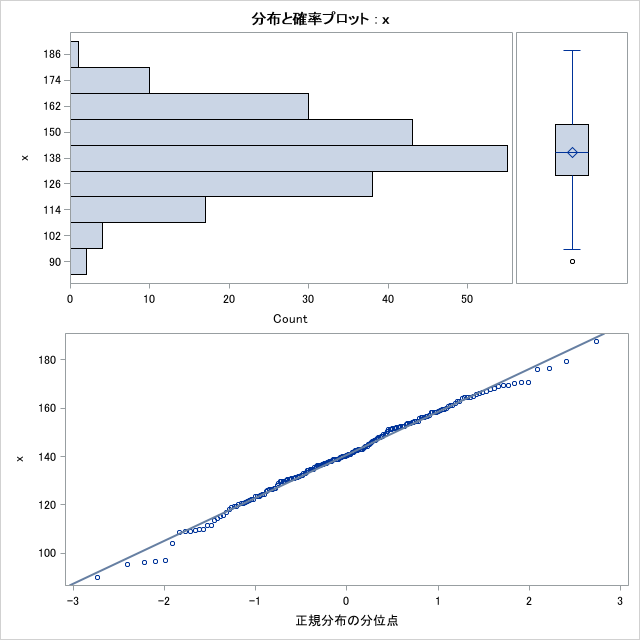

In [19]:
data simula1;
  do i = 1 to 200;
    x = 140 + 20*rannor(3452083);
    output;
  end;
run;

title1 'Simulated Normal Variate';
title2 'with Mean 140 and Standard Deviation 20'; 
proc univariate data=simula1 plot;
  var x;
run;

**rannor()**関数は、平均0、標準偏差1の標準正規分布から（疑似）乱数を返します。x=割り当てステートメントは、乱数を平均140、標準偏差20の正規分布からのものに変更します。OUTPUTステートメントは、DOループの各反復後に乱数を出力するために使用されなければなりません。OUTPUTステートメントが存在しない場合、最後に生成された1つの乱数だけが得られます。ちなみに、**rannor()**関数は**normal()**関数の別名(エイリアス)です。

プログラムを開いて実行し、UNIVARIATEプロシージャの出力をレビューしましょう。データが正規分布から生じたことを確信できるようにするために、幹葉プロット、箱ひげ図、および正規確率プロットが表示されるはずです。また、200オブザベーションのサンプル平均とサンプル標準偏差が、それぞれ140と20にどれだけ近いか（効果的に）確認することもできます。


<!-- 
The **rannor** ( ) function returns a (pseudo) random number from a standard normal distribution with mean 0 and standard deviation 1. The x= assignment statement modifies the random number so that it comes from a normal distribution with mean 140 and standard deviation 20. The OUTPUT statement must be used to dump the random number after each iteration of the DO loop. If the OUTPUT function is not present, you would end up with only one random number, namely the last one generated. Incidentally, the **rannor** ( ) function is an alias for the **normal** ( ) function.
Launch and run the SAS program, so you can review the output from the UNIVARIATE procedure. You should see a stem-and-leaf plot, a boxplot, and a normal probability plot that should make it believable that the data arose from a normal distribution. You might also want to check out the sample mean and sample standard deviation to see how (impressively) close they are to 140 and 20, respectively, with a sample of just 200 observations.
-->

### 例

以下のプログラムは、n = 20、p = 0.5の二項分布から20オブザベーションのランダムサンプルを生成するためにranbin(seed, n, p)関数を使用します。

<!-- 
### Example

The following program uses the **ranbin** (seed, n, p) function to generate a random sample of 20 observations from a binomial distribution with n = 20 and p = 0.5:
-->


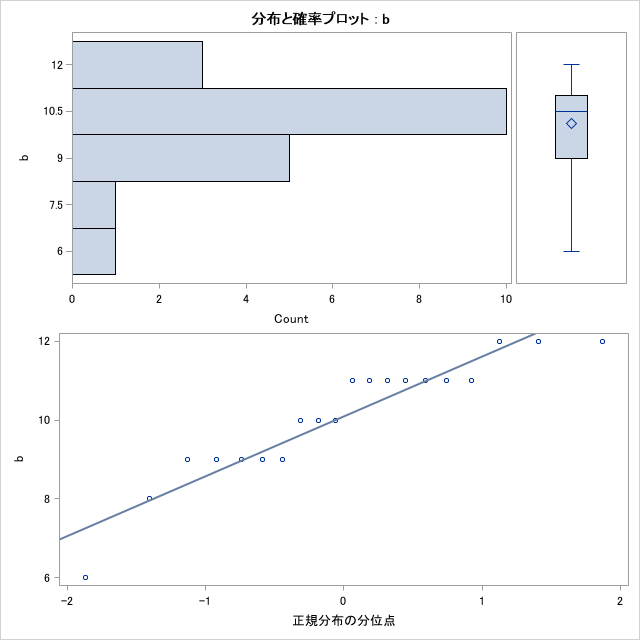

In [20]:
data simula2;
  do i = 1 to 20;
    b = ranbin(2340234,20,0.5);
    output;
  end;
run;

title1 'Simulated Binomial Variate';
title2 'with n = 20 and p = 0.5';    
proc univariate data=simula2 plot;
  var b;    
run;

プログラムを開いて実行し、UNIVARIATEプロシージャの出力を確認しましょう。20オブザベーションのサンプル平均とサンプル標準偏差が、それぞれ10（np）および2.24（np(1-p)の平方根）にどれだけ近いか（効果的に）確認することもできます。

<!-- 
Launch and run the SAS program, so you can review the output from the UNIVARIATE procedure. You might want to check out the sample mean and sample standard deviation to see how (impressively) close they are to 10 (np) and 2.24 (square root of np(1-p)), respectively, with a sample of just 20 observations.
-->

### 例

以下のプログラムは、平均4のポアソン分布から200オブザベーションのランダムサンプルを生成するためにranpoi(seed, mean)関数を使用します。


<!-- 
### Example

The following program uses the **ranpoi** (seed, mean) function to generate a random sample of 200 observations from a Poisson distribution with a mean of 4:
-->


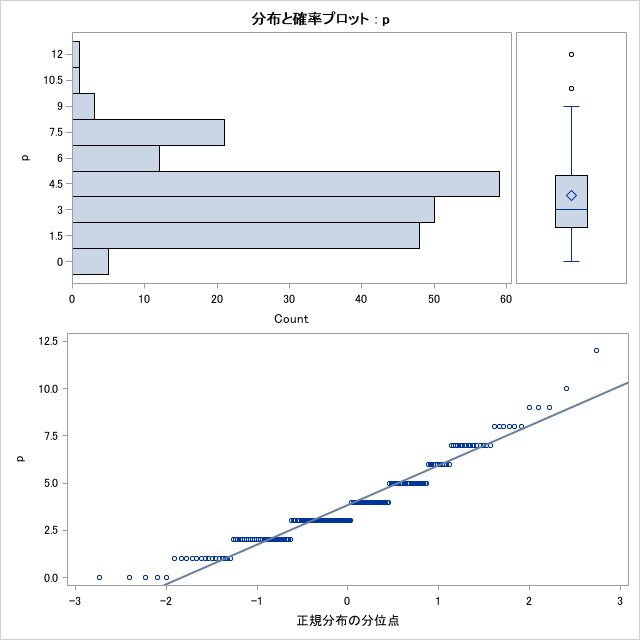

In [21]:
data simula3;
  do i = 1 to 200;
    p = ranpoi(67, 4);
    output;
  end;
run;

title 'Simulated Poisson Variate with Mean 4';
proc univariate data=simula3 plot;    
  var p;
run;

プログラムを開いて実行し、UNIVARIATEプロシージャの出力を確認しましょう。200オブザベーションのサンプル平均とサンプル標準偏差が、それぞれ4および2にどれだけ近いか（効果的に）確認することもできます。


<!-- 
Launch and run the SAS program, so you can review the output from the UNIVARIATE procedure. You might want to check out the sample mean and sample standard deviation to see how (impressively) close they are to 4 and 2, respectively, with a sample of just 200 observations.
-->

## 演習

1. この例では、母比率の標本分布を扱います。  
    a) n = 1、p = 0.3の二項分布からサイズ50の500個のサンプルを生成してください。これを行うために、この二項分布からのランダム変量で埋められた500行50列のデータセットを生成します。ヒント：配列とネストされたDOループを使用します。  
    b) mean(of )を使用して、これら500行の各行の平均を計算し、この平均を新しい列として保存してください。  
    c) part bで計算された500個の平均のヒストグラムをプロットし、part bで計算された500個の平均からの平均と標準偏差を計算するためにPROC MEANSを使用してください。これは、サンプルサイズが30のときに成功確率p = 0.3の母集団分布を持つ場合のp-hatの標本分布を表しています。  

<!-- 
## Exercises

1. In this example, we will explore the sampling distribution of a sample proportion.
    a) Generate 500 sample of size 50 from a Binomial distribution with n = 1 and p = 0.3. Do this by generating a dataset with 500 rows and 50 columns all filled with random variates from this binomial distribution. Hint: Use an array and a nested DO loop.
    b) Calculate the mean of each of these 500 rows using mean(of ) in a DATA step. Save this mean as a new column.
    c) Plot a histogram of the 500 means calculated in part b and use PROC MEANS to calculate the MEAN and standard deviation of the 500 means calculated in part b. This describes the sampling distribution of p-hat when the population distiribution has probability of success p = 0.3 when the sample size is 30.
-->